In [22]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
# Read file into DataFrame
medicare_insulin = pd.read_csv('Resources/Medicare_Part_D_Spending_by_Drug_2021.csv')
#medi_df.head(20)
medicare_insulin.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2017,Tot_Dsg_Unts_2017,Tot_Clms_2017,Tot_Benes_2017,Avg_Spnd_Per_Dsg_Unt_Wghtd_2017,Avg_Spnd_Per_Clm_2017,...,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Chg_Avg_Spnd_Per_Dsg_Unt_20_21,CAGR_Avg_Spnd_Per_Dsg_Unt_17_21
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,217938.04,1014318.0,8595.0,3025.0,0.216105,25.356375,...,102280.76,459384.0,3708,1313.0,0.223001,27.583808,77.898522,0,0.024346,0.007885
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,402124.68,1850703.0,15403.0,5967.0,0.217359,26.106906,...,131927.33,566872.0,4564,1766.0,0.232812,28.906076,74.704037,0,0.159124,0.017317
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,402124.68,1850703.0,15403.0,5967.0,0.217359,26.106906,...,131927.33,566872.0,4564,1766.0,0.232812,28.906076,74.704037,0,0.159124,0.017317
4,Abacavir,Abacavir Sulfate,7,Overall,13386250.08,3189707.0,48283.0,8090.0,4.298589,277.245616,...,7038593.83,2501447.0,30540,4254.0,3.187698,230.471311,1654.582471,0,-0.087066,-0.072022


In [24]:
medicare_insulin.columns

Index(['Brnd_Name', 'Gnrc_Name', 'Tot_Mftr', 'Mftr_Name', 'Tot_Spndng_2017',
       'Tot_Dsg_Unts_2017', 'Tot_Clms_2017', 'Tot_Benes_2017',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2017', 'Avg_Spnd_Per_Clm_2017',
       'Avg_Spnd_Per_Bene_2017', 'Outlier_Flag_2017', 'Tot_Spndng_2018',
       'Tot_Dsg_Unts_2018', 'Tot_Clms_2018', 'Tot_Benes_2018',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Clm_2018',
       'Avg_Spnd_Per_Bene_2018', 'Outlier_Flag_2018', 'Tot_Spndng_2019',
       'Tot_Dsg_Unts_2019', 'Tot_Clms_2019', 'Tot_Benes_2019',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Clm_2019',
       'Avg_Spnd_Per_Bene_2019', 'Outlier_Flag_2019', 'Tot_Spndng_2020',
       'Tot_Dsg_Unts_2020', 'Tot_Clms_2020', 'Tot_Benes_2020',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Clm_2020',
       'Avg_Spnd_Per_Bene_2020', 'Outlier_Flag_2020', 'Tot_Spndng_2021',
       'Tot_Dsg_Unts_2021', 'Tot_Clms_2021', 'Tot_Benes_2021',
       'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_S

In [25]:
# Define the names to filter in the 'Gnrc_Name' column
medi_names_to_filter = ['Insulin Glulisine','Insulin Lispro', 'Insulin Aspart','Insulin Regular, Human']
# Define relevant columns for the year 2019
medi_relevant_columns_2019 = ['Gnrc_Name', 'Mftr_Name', 'Tot_Spndng_2019', 'Tot_Dsg_Unts_2019']
# Filter rows based on 'Gnrc_Name' and 'Mftr_Name' conditions
filtered_df = medicare_insulin[medicare_insulin['Gnrc_Name'].isin(medi_names_to_filter) & ~medicare_insulin['Mftr_Name'].str.contains('Overall')]
# Select relevant columns for the year 2019
medi_result_df_2019 = filtered_df[medi_relevant_columns_2019]
# Display the result DataFrame
print(medi_result_df_2019)
medi_result_df_2019.head()
#medi = medi_result_df_2019['Mftr_Name'].value('Tot_Spndng_2019')
#medi

                   Gnrc_Name        Mftr_Name  Tot_Spndng_2019  \
243           Insulin Lispro   Sanofi-Aventis     2.076727e+06   
245           Insulin Lispro   Sanofi-Aventis     5.632924e+06   
271   Insulin Regular, Human  Mannkind Corpor     7.000875e+06   
772        Insulin Glulisine   Sanofi-Aventis     5.352751e+06   
774        Insulin Glulisine   Sanofi-Aventis     1.401256e+07   
5771          Insulin Lispro  Eli Lilly & Co.     5.492364e+08   
5773          Insulin Lispro  Eli Lilly & Co.     4.230471e+06   
5775          Insulin Lispro  Eli Lilly & Co.     1.218056e+09   
5777          Insulin Lispro  Eli Lilly & Co.     1.402135e+08   
5815  Insulin Regular, Human  Eli Lilly & Co.     6.623255e+07   
5817  Insulin Regular, Human  Eli Lilly & Co.     1.077373e+08   
5819  Insulin Regular, Human  Eli Lilly & Co.     2.067820e+08   
6211          Insulin Aspart     Novo Nordisk              NaN   
6213          Insulin Aspart     Novo Nordisk              NaN   
6215      

,Gnrc_Name,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019
243,Insulin Lispro,Sanofi-Aventis,2076727.30,120033.714
245,Insulin Lispro,Sanofi-Aventis,5632924.42,1248401.999
271,"Insulin Regular, Human",Mannkind Corpor,7000874.53,977880.000
772,Insulin Glulisine,Sanofi-Aventis,5352750.90,192660.000
774,Insulin Glulisine,Sanofi-Aventis,14012558.62,389544.000


In [26]:
#Total Spending by Manuf
medi_2019_result = medi_result_df_2019.groupby('Mftr_Name').sum()
medi_2019_result

,Gnrc_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019
Mftr_Name,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.323283e+09,6.984759e+07
Mannkind Corpor,"Insulin Regular, Human",7.000875e+06,9.778800e+05
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.565845e+09,7.579399e+07
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",4.525436e+06,1.605562e+06
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.707496e+07,1.950640e+06


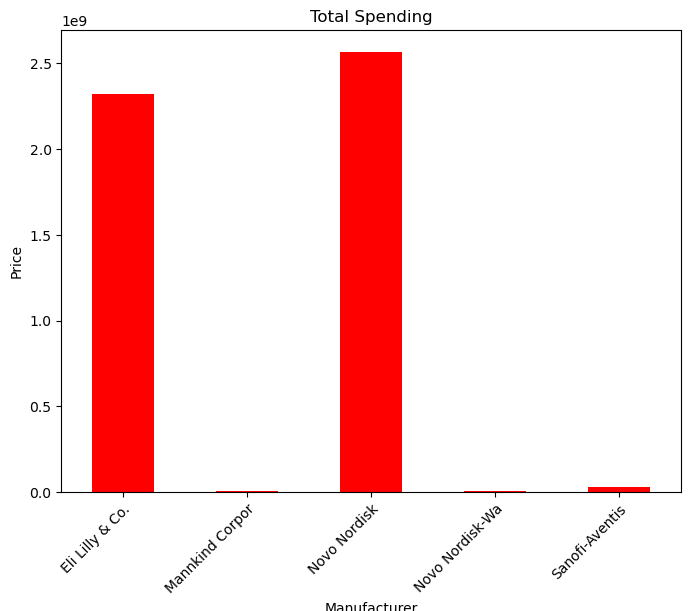

In [27]:
# Configure plot, ,6figsize, title, and axis labels
fig1 = medi_2019_result['Tot_Spndng_2019'].plot(kind="bar", facecolor="red", figsize=(8,6),
                             title = "Total Spending",
                             xlabel = "Manufacturer",
                             ylabel = "Price")

# Configure x-tick rotation
xticklabels = medi_2019_result.index

fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [28]:
# Define the names to filter in the 'Gnrc_Name' column
medi_names_to_filter = ['Insulin Glulisine','Insulin Lispro', 'Insulin Aspart','Insulin Regular, Human']
# Define relevant columns for the year 2019
medi_relevant_columns_2019 = ['Gnrc_Name', 'Mftr_Name', 'Tot_Spndng_2019', 'Tot_Dsg_Unts_2019']
# Filter rows based on 'Gnrc_Name' and 'Mftr_Name' conditions
filtered_df = medicare_insulin[medicare_insulin['Gnrc_Name'].isin(medi_names_to_filter) & ~medicare_insulin['Mftr_Name'].str.contains('Overall')]
# Select relevant columns for the year 2019
medi_result_df_2019 = filtered_df[medi_relevant_columns_2019]
# Display the result DataFrame
print(medi_result_df_2019)
medi_result_df_2019.head()

                   Gnrc_Name        Mftr_Name  Tot_Spndng_2019  \
243           Insulin Lispro   Sanofi-Aventis     2.076727e+06   
245           Insulin Lispro   Sanofi-Aventis     5.632924e+06   
271   Insulin Regular, Human  Mannkind Corpor     7.000875e+06   
772        Insulin Glulisine   Sanofi-Aventis     5.352751e+06   
774        Insulin Glulisine   Sanofi-Aventis     1.401256e+07   
5771          Insulin Lispro  Eli Lilly & Co.     5.492364e+08   
5773          Insulin Lispro  Eli Lilly & Co.     4.230471e+06   
5775          Insulin Lispro  Eli Lilly & Co.     1.218056e+09   
5777          Insulin Lispro  Eli Lilly & Co.     1.402135e+08   
5815  Insulin Regular, Human  Eli Lilly & Co.     6.623255e+07   
5817  Insulin Regular, Human  Eli Lilly & Co.     1.077373e+08   
5819  Insulin Regular, Human  Eli Lilly & Co.     2.067820e+08   
6211          Insulin Aspart     Novo Nordisk              NaN   
6213          Insulin Aspart     Novo Nordisk              NaN   
6215      

,Gnrc_Name,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019
243,Insulin Lispro,Sanofi-Aventis,2076727.30,120033.714
245,Insulin Lispro,Sanofi-Aventis,5632924.42,1248401.999
271,"Insulin Regular, Human",Mannkind Corpor,7000874.53,977880.000
772,Insulin Glulisine,Sanofi-Aventis,5352750.90,192660.000
774,Insulin Glulisine,Sanofi-Aventis,14012558.62,389544.000


In [29]:
#Total Dosage by Manuf
medi_2019_result = medi_result_df_2019.groupby('Mftr_Name').sum()
medi_2019_result

,Gnrc_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019
Mftr_Name,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.323283e+09,6.984759e+07
Mannkind Corpor,"Insulin Regular, Human",7.000875e+06,9.778800e+05
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.565845e+09,7.579399e+07
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",4.525436e+06,1.605562e+06
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.707496e+07,1.950640e+06


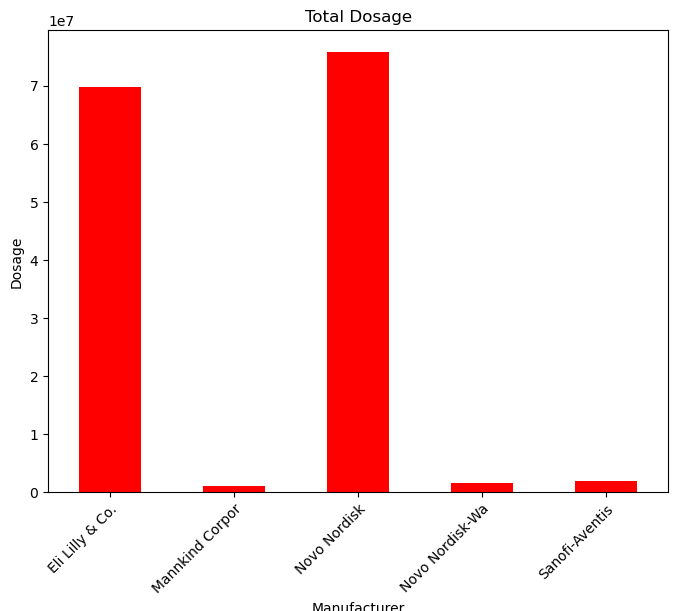

In [30]:
# Configure plot, ,6figsize, title, and axis labels
fig1 = medi_2019_result['Tot_Dsg_Unts_2019'].plot(kind="bar", facecolor="red", figsize=(8,6),
                             title = "Total Dosage",
                             xlabel = "Manufacturer",
                             ylabel = "Dosage")

# Configure x-tick rotation
xticklabels = medi_2019_result.index
fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)
# Show plot
plt.show()

In [31]:
medi_2019_result.columns

Index(['Gnrc_Name', 'Tot_Spndng_2019', 'Tot_Dsg_Unts_2019'], dtype='object')

In [32]:
#Avg cost per dosage by manuf Tot_Spndng_2019/Tot_Dsg_Unts_2019

medi_2019_result['Avg_Cost_Per_Dsg_2019'] = medi_2019_result['Tot_Spndng_2019']/medi_2019_result['Tot_Dsg_Unts_2019']
medi_2019_result

,Gnrc_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Avg_Cost_Per_Dsg_2019
Mftr_Name,,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.323283e+09,6.984759e+07,33.262180
Mannkind Corpor,"Insulin Regular, Human",7.000875e+06,9.778800e+05,7.159237
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.565845e+09,7.579399e+07,33.852877
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",4.525436e+06,1.605562e+06,2.818599
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.707496e+07,1.950640e+06,13.880042


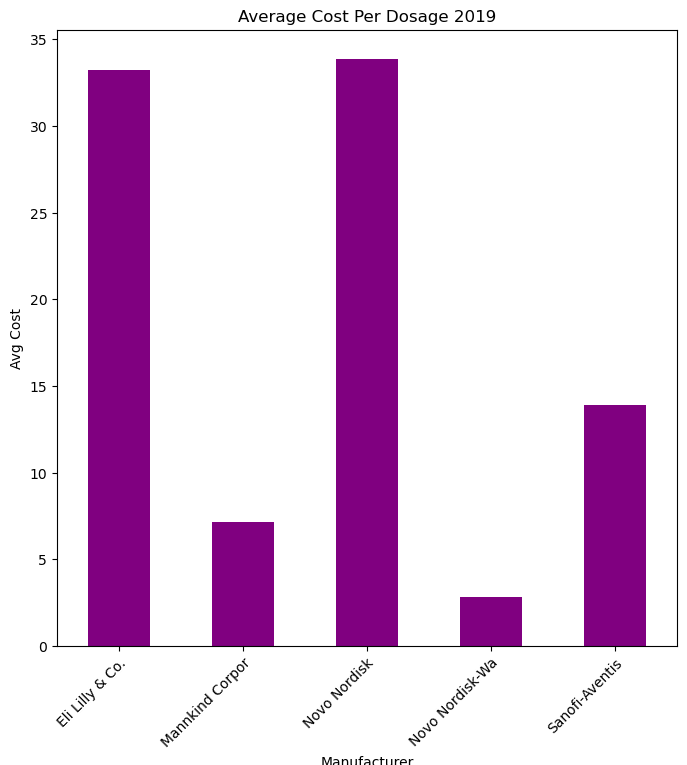

In [54]:
# Configure plot, ,6figsize, title, and axis labels
fig1 = medi_2019_result['Avg_Cost_Per_Dsg_2019'].plot(kind="bar", facecolor="purple", figsize=(8,8),
                             title = "Average Cost Per Dosage 2019",
                             xlabel = "Manufacturer",
                             ylabel = "Avg Cost")

# Configure x-tick rotation
xticklabels = medi_2019_result.index
plt.ticklabel_format(style = 'plain', axis='y')
fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#save graph
plt.savefig('Resources/avg_cost_2019.png')
# Show plot
plt.show()



In [41]:
# Define the names to filter in the 'Gnrc_Name' column
medi_names_to_filter = ['Insulin Glulisine','Insulin Lispro', 'Insulin Aspart','Insulin Regular, Human']
# Define relevant columns for the year 2020
medi_relevant_columns_2020 = ['Gnrc_Name', 'Mftr_Name', 'Tot_Spndng_2020', 'Tot_Dsg_Unts_2020']
# Filter rows based on 'Gnrc_Name' and 'Mftr_Name' conditions
filtered_df = medicare_insulin[medicare_insulin['Gnrc_Name'].isin(medi_names_to_filter) & ~medicare_insulin['Mftr_Name'].str.contains('Overall')]
# Select relevant columns for the year 2020
medi_result_df_2020 = filtered_df[medi_relevant_columns_2020]
# Display the result DataFrame
print(medi_result_df_2020)
medi_result_df_2020.head()

                   Gnrc_Name        Mftr_Name  Tot_Spndng_2020  \
243           Insulin Lispro   Sanofi-Aventis     2.461450e+06   
245           Insulin Lispro   Sanofi-Aventis     5.785748e+06   
271   Insulin Regular, Human  Mannkind Corpor     8.007830e+06   
772        Insulin Glulisine   Sanofi-Aventis     4.528780e+06   
774        Insulin Glulisine   Sanofi-Aventis     1.226855e+07   
5771          Insulin Lispro  Eli Lilly & Co.     4.492513e+08   
5773          Insulin Lispro  Eli Lilly & Co.     6.145479e+06   
5775          Insulin Lispro  Eli Lilly & Co.     1.053916e+09   
5777          Insulin Lispro  Eli Lilly & Co.     1.545332e+08   
5815  Insulin Regular, Human  Eli Lilly & Co.     6.390659e+07   
5817  Insulin Regular, Human  Eli Lilly & Co.     9.552538e+07   
5819  Insulin Regular, Human  Eli Lilly & Co.     2.318727e+08   
6211          Insulin Aspart     Novo Nordisk     1.178440e+07   
6213          Insulin Aspart     Novo Nordisk     3.087250e+07   
6215      

,Gnrc_Name,Mftr_Name,Tot_Spndng_2020,Tot_Dsg_Unts_2020
243,Insulin Lispro,Sanofi-Aventis,2461450.03,181351.0
245,Insulin Lispro,Sanofi-Aventis,5785747.56,339259.0
271,"Insulin Regular, Human",Mannkind Corpor,8007830.06,1036929.0
772,Insulin Glulisine,Sanofi-Aventis,4528780.01,163032.0
774,Insulin Glulisine,Sanofi-Aventis,12268554.96,340665.0


In [42]:
#Total Dosage by Manuf 2020
medi_2020_result = medi_result_df_2020.groupby('Mftr_Name').sum()
medi_2020_result

,Gnrc_Name,Tot_Spndng_2020,Tot_Dsg_Unts_2020
Mftr_Name,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.252853e+09,7.220593e+07
Mannkind Corpor,"Insulin Regular, Human",8.007830e+06,1.036929e+06
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.534526e+09,7.488429e+07
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",4.246875e+06,1.496049e+06
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.504453e+07,1.024307e+06


In [43]:
#Avg cost per dosage by manuf Tot_Spndng_2020/Tot_Dsg_Unts_2020

medi_2020_result['Avg_Cost_Per_Dsg_2020'] = medi_2020_result['Tot_Spndng_2020']/medi_2020_result['Tot_Dsg_Unts_2020']
medi_2020_result

,Gnrc_Name,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Avg_Cost_Per_Dsg_2020
Mftr_Name,,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.252853e+09,7.220593e+07,31.200388
Mannkind Corpor,"Insulin Regular, Human",8.007830e+06,1.036929e+06,7.722641
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.534526e+09,7.488429e+07,33.845892
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",4.246875e+06,1.496049e+06,2.838728
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.504453e+07,1.024307e+06,24.450221


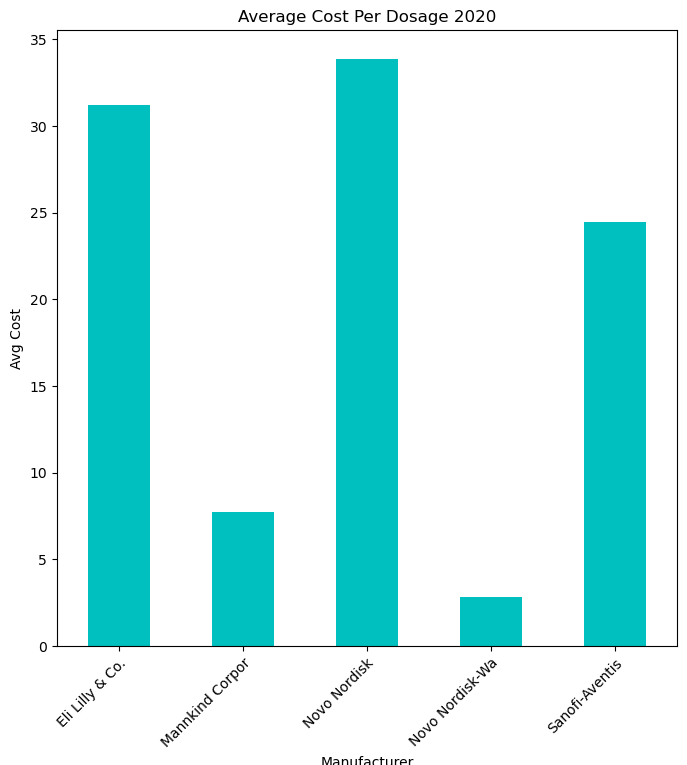

In [56]:
# Configure plot, ,6figsize, title, and axis labels
fig1 = medi_2020_result['Avg_Cost_Per_Dsg_2020'].plot(kind="bar", facecolor="c", figsize=(8,8),
                             title = "Average Cost Per Dosage 2020",
                             xlabel = "Manufacturer",
                             ylabel = "Avg Cost")

# Configure x-tick rotation
xticklabels = medi_2020_result.index
plt.ticklabel_format(style = 'plain', axis='y')
fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#save graph
plt.savefig('Resources/avg_cost_2020.png')
# Show plot
plt.show()


In [45]:
# Define the names to filter in the 'Gnrc_Name' column
medi_names_to_filter = ['Insulin Glulisine','Insulin Lispro', 'Insulin Aspart','Insulin Regular, Human']
# Define relevant columns for the year 2021
medi_relevant_columns_2021 = ['Gnrc_Name', 'Mftr_Name', 'Tot_Spndng_2021', 'Tot_Dsg_Unts_2021']
# Filter rows based on 'Gnrc_Name' and 'Mftr_Name' conditions
filtered_df = medicare_insulin[medicare_insulin['Gnrc_Name'].isin(medi_names_to_filter) & ~medicare_insulin['Mftr_Name'].str.contains('Overall')]
# Select relevant columns for the year 2021
medi_result_df_2021 = filtered_df[medi_relevant_columns_2021]
# Display the result DataFrame
print(medi_result_df_2021)
medi_result_df_2021.head()

                   Gnrc_Name        Mftr_Name  Tot_Spndng_2021  \
243           Insulin Lispro   Sanofi-Aventis     2.224715e+06   
245           Insulin Lispro   Sanofi-Aventis     6.137620e+06   
271   Insulin Regular, Human  Mannkind Corpor     1.039369e+07   
772        Insulin Glulisine   Sanofi-Aventis     3.769932e+06   
774        Insulin Glulisine   Sanofi-Aventis     1.033819e+07   
5771          Insulin Lispro  Eli Lilly & Co.     4.350572e+08   
5773          Insulin Lispro  Eli Lilly & Co.     7.637031e+06   
5775          Insulin Lispro  Eli Lilly & Co.     1.076262e+09   
5777          Insulin Lispro  Eli Lilly & Co.     1.785742e+08   
5815  Insulin Regular, Human  Eli Lilly & Co.     6.092082e+07   
5817  Insulin Regular, Human  Eli Lilly & Co.     8.820523e+07   
5819  Insulin Regular, Human  Eli Lilly & Co.     2.493683e+08   
6211          Insulin Aspart     Novo Nordisk     1.982417e+07   
6213          Insulin Aspart     Novo Nordisk     5.999348e+07   
6215      

,Gnrc_Name,Mftr_Name,Tot_Spndng_2021,Tot_Dsg_Unts_2021
243,Insulin Lispro,Sanofi-Aventis,2224714.69,161708.1
245,Insulin Lispro,Sanofi-Aventis,6137620.19,352790.0
271,"Insulin Regular, Human",Mannkind Corpor,10393693.26,1216380.0
772,Insulin Glulisine,Sanofi-Aventis,3769932.12,134030.0
774,Insulin Glulisine,Sanofi-Aventis,10338190.91,284742.0


In [46]:
#Total Dosage by Manuf 2021
medi_2021_result = medi_result_df_2021.groupby('Mftr_Name').sum()
medi_2021_result

,Gnrc_Name,Tot_Spndng_2021,Tot_Dsg_Unts_2021
Mftr_Name,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.357312e+09,7.481477e+07
Mannkind Corpor,"Insulin Regular, Human",1.039369e+07,1.216380e+06
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.505626e+09,7.406664e+07
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",5.164905e+06,1.450119e+06
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.247046e+07,9.332701e+05


In [47]:
#Avg cost per dosage by manuf Tot_Spndng_2021/Tot_Dsg_Unts_2021

medi_2021_result['Avg_Cost_Per_Dsg_2021'] = medi_2021_result['Tot_Spndng_2021']/medi_2021_result['Tot_Dsg_Unts_2021']
medi_2021_result

,Gnrc_Name,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Avg_Cost_Per_Dsg_2021
Mftr_Name,,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.357312e+09,7.481477e+07,31.508652
Mannkind Corpor,"Insulin Regular, Human",1.039369e+07,1.216380e+06,8.544775
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.505626e+09,7.406664e+07,33.829351
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",5.164905e+06,1.450119e+06,3.561712
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.247046e+07,9.332701e+05,24.077122


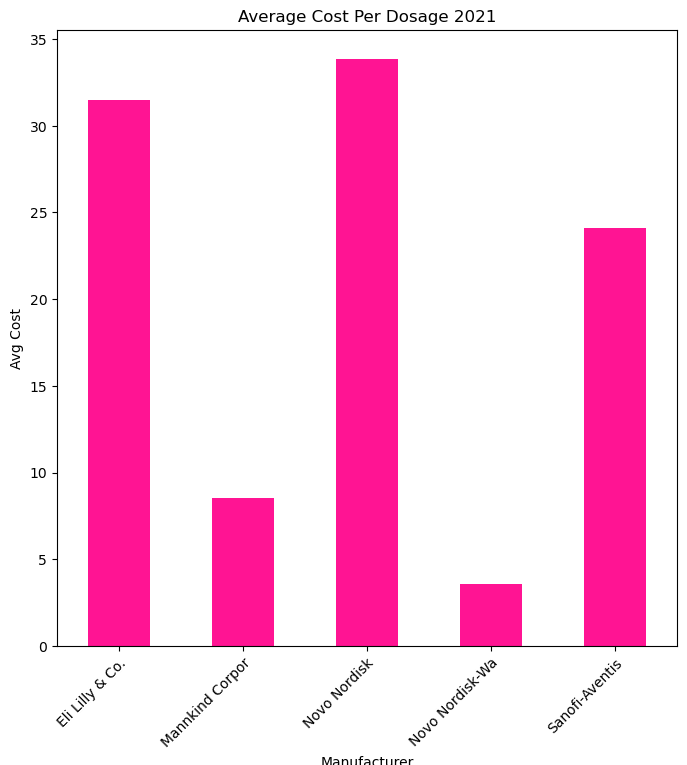

In [57]:
# Configure plot, ,6figsize, title, and axis labels
fig1 = medi_2021_result['Avg_Cost_Per_Dsg_2021'].plot(kind="bar", facecolor="deeppink", figsize=(8,8),
                             title = "Average Cost Per Dosage 2021",
                             xlabel = "Manufacturer",
                             ylabel = "Avg Cost")

# Configure x-tick rotation
xticklabels = medi_2021_result.index
plt.ticklabel_format(style = 'plain', axis='y')
fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#show graph
plt.savefig('Resources/avg_cost_2021.png')
# Show plot
plt.show()



In [143]:
# Define the names to filter in the 'Gnrc_Name' column
medi_names_to_filter = ['Insulin Glulisine','Insulin Lispro', 'Insulin Aspart','Insulin Regular, Human']
# Define relevant columns for the year 2019-2021
medi_relevant_columns_2019_2021 = ['Gnrc_Name', 'Mftr_Name', 'Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']
# Filter rows based on 'Gnrc_Name' and 'Mftr_Name' conditions
filtered_df = medicare_insulin[medicare_insulin['Gnrc_Name'].isin(medi_names_to_filter) & ~medicare_insulin['Mftr_Name'].str.contains('Overall')]
# Select relevant columns for the year 2019-2021
medi_result_2019_2021 = filtered_df[medi_relevant_columns_2019_2021]
# Display the result DataFrame
print(medi_result_2019_2021)

                   Gnrc_Name        Mftr_Name  Tot_Spndng_2019  \
243           Insulin Lispro   Sanofi-Aventis     2.076727e+06   
245           Insulin Lispro   Sanofi-Aventis     5.632924e+06   
271   Insulin Regular, Human  Mannkind Corpor     7.000875e+06   
772        Insulin Glulisine   Sanofi-Aventis     5.352751e+06   
774        Insulin Glulisine   Sanofi-Aventis     1.401256e+07   
5771          Insulin Lispro  Eli Lilly & Co.     5.492364e+08   
5773          Insulin Lispro  Eli Lilly & Co.     4.230471e+06   
5775          Insulin Lispro  Eli Lilly & Co.     1.218056e+09   
5777          Insulin Lispro  Eli Lilly & Co.     1.402135e+08   
5815  Insulin Regular, Human  Eli Lilly & Co.     6.623255e+07   
5817  Insulin Regular, Human  Eli Lilly & Co.     1.077373e+08   
5819  Insulin Regular, Human  Eli Lilly & Co.     2.067820e+08   
6211          Insulin Aspart     Novo Nordisk              NaN   
6213          Insulin Aspart     Novo Nordisk              NaN   
6215      

In [144]:
#Total Spending by Manuf
medi_2019_2021_result = medi_result_2019_2021.groupby('Mftr_Name').sum()
medi_2019_2021_result
#medi_2019_2021_result.columns

,Gnrc_Name,Tot_Spndng_2019,Tot_Spndng_2020,Tot_Spndng_2021
Mftr_Name,,,,
Eli Lilly & Co.,Insulin LisproInsulin LisproInsulin LisproInsu...,2.323283e+09,2.252853e+09,2.357312e+09
Mannkind Corpor,"Insulin Regular, Human",7.000875e+06,8.007830e+06,1.039369e+07
Novo Nordisk,Insulin AspartInsulin AspartInsulin AspartInsu...,2.565845e+09,2.534526e+09,2.505626e+09
Novo Nordisk-Wa,"Insulin Regular, HumanInsulin Regular, HumanIn...",4.525436e+06,4.246875e+06,5.164905e+06
Sanofi-Aventis,Insulin LisproInsulin LisproInsulin GlulisineI...,2.707496e+07,2.504453e+07,2.247046e+07


In [145]:
#tot_spndng_2019_2021 = medi_2019_2021_result['Tot_Spndng_2019', 'Tot_Spndng_2020', 'Tot_Spndng_2021']


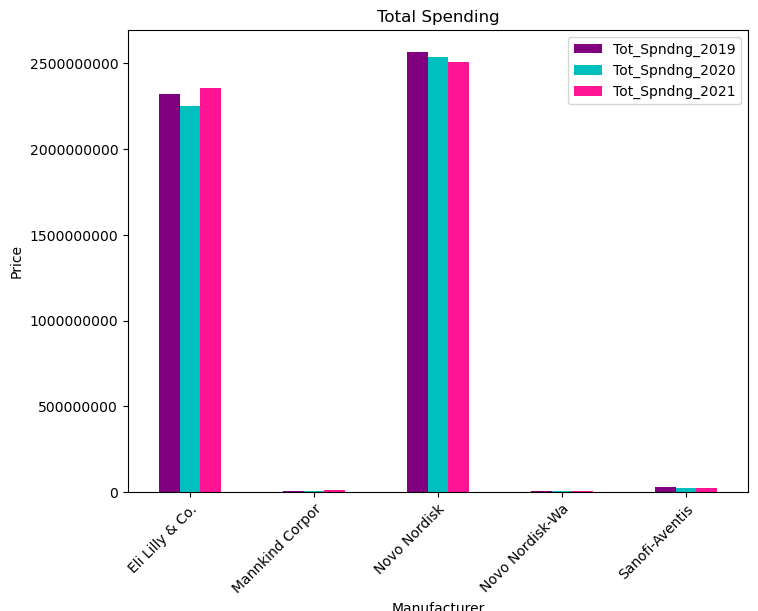

In [146]:
# Configure plot, ,6figsize, title, and axis labels
fig1 = medi_2019_2021_result.plot(kind="bar", color=["purple", "c", "deeppink"], figsize=(8,6),
                             title = "Total Spending",
                             xlabel = "Manufacturer",
                             ylabel = "Price")

# Configure x-tick rotation
xticklabels = medi_2019_2021_result.index
plt.ticklabel_format(style = 'plain', axis='y')
fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [152]:
# Define the names to filter in the 'Gnrc_Name' column
medi_names_to_filter = ['Insulin Glulisine','Insulin Lispro', 'Insulin Aspart','Insulin Regular, Human']
# Define relevant columns for the year 2019-2021
medi_relevant_columns_2019_2021 = ['Gnrc_Name', 'Mftr_Name', 'Tot_Dsg_Unts_2019', 'Tot_Dsg_Unts_2020', 'Tot_Dsg_Unts_2021']
# Filter rows based on 'Gnrc_Name' and 'Mftr_Name' conditions
filtered_df = medicare_insulin[medicare_insulin['Gnrc_Name'].isin(medi_names_to_filter) & ~medicare_insulin['Mftr_Name'].str.contains('Overall')]
# Select relevant columns for the year 2019-2021
medi_result_2019_2021 = filtered_df[medi_relevant_columns_2019_2021]
# Display the result DataFrame
print(medi_result_2019_2021)

                   Gnrc_Name        Mftr_Name  Tot_Dsg_Unts_2019  \
243           Insulin Lispro   Sanofi-Aventis       1.200337e+05   
245           Insulin Lispro   Sanofi-Aventis       1.248402e+06   
271   Insulin Regular, Human  Mannkind Corpor       9.778800e+05   
772        Insulin Glulisine   Sanofi-Aventis       1.926600e+05   
774        Insulin Glulisine   Sanofi-Aventis       3.895440e+05   
5771          Insulin Lispro  Eli Lilly & Co.       2.068148e+07   
5773          Insulin Lispro  Eli Lilly & Co.       1.216120e+05   
5775          Insulin Lispro  Eli Lilly & Co.       3.493181e+07   
5777          Insulin Lispro  Eli Lilly & Co.       1.976476e+06   
5815  Insulin Regular, Human  Eli Lilly & Co.       6.641352e+06   
5817  Insulin Regular, Human  Eli Lilly & Co.       1.456718e+06   
5819  Insulin Regular, Human  Eli Lilly & Co.       2.203220e+06   
6211          Insulin Aspart     Novo Nordisk                NaN   
6213          Insulin Aspart     Novo Nordisk   

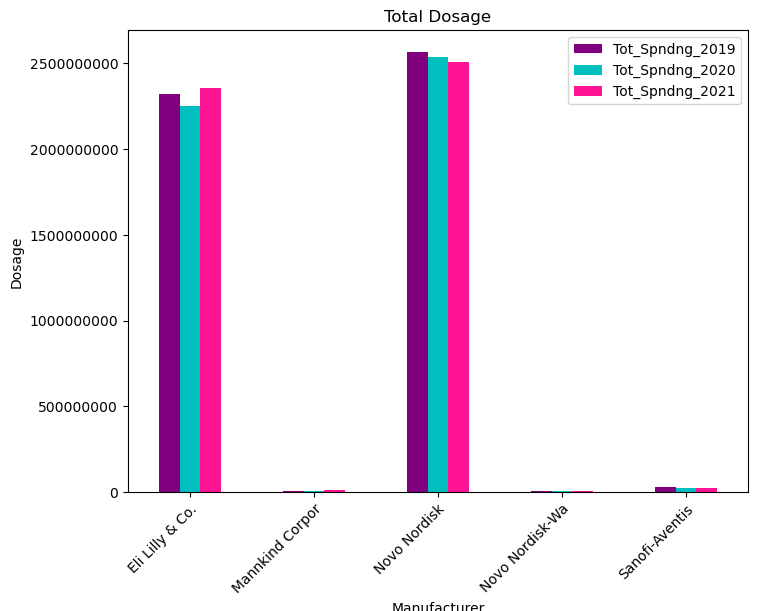

In [150]:
# Configure plot, ,6figsize, title, and axis labels
fig1 = medi_2019_2021_result.plot(kind="bar", color=["purple", "c", "deeppink"], figsize=(8,6),
                             title = "Total Dosage",
                             xlabel = "Manufacturer",
                             ylabel = "Dosage")

# Configure x-tick rotation
xticklabels = medi_2019_2021_result.index
plt.ticklabel_format(style = 'plain', axis='y')
fig1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()